# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

## Imports and data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
%matplotlib inline


df = pd.read_csv('data/human_body_temperature.csv')

## Question 1
### Is the distribution of body temperatures normal?

In order to determine if the distribution of body temperatures is normal, I will plot the temperature data in a histogram and overlay the normal distrubution.

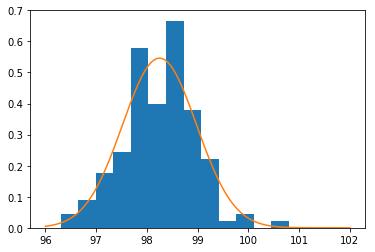

In [2]:
plt.hist(df.temperature, bins=13, normed=True)

xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(df.temperature))

# generate normal disribution
m, s = stats.norm.fit(df.temperature) # find mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # find the normal probablity density  
plt.plot(lnspc, pdf_g)

plt.show()

Looking at the histogram, we can see that our distrubition of body temperatures appears to be approximately normal.

## Question 2
### Is the sample size large? Are the observations independent?

In [3]:
len(df.temperature)

130

With a sample size of 130, there should be a sufficient amount of obsservations to continue. However, a larger smaple size might provide better insights into the population as a whole.

Without more information, it is difficult to determine if the observations are indeed independent. However, if we assume that each observation was taken from a different individual the sample should be considered approximately independent.

## Question 3
### Is the true population mean really 98.6 degrees F?

Would you use a one-sample or two-sample test? Why?

##### A one-sample test will be sufficient in our test since the data we are testing is made up of one sample group. 

In this situation, is it appropriate to use the  tt  or  zz  statistic?

##### A tt statistic is the appropriate choice in this situation because even though our sample size is > 30,  we do not know the true standard deviation of the population mean. In it's place we can use our sample mean as an approximation of the population mean. Both tests will be conducted and results compared.


In [8]:
df.temperature.mean()

98.24923076923078

In [9]:
t_temp = (df.temperature.mean() - 98.6) / (df.temperature.std() / (np.sqrt(len(df.temperature))))

In [10]:
t_temp

-5.4548232923640789

A 95% confidence level for a two-tailed t-test with 129 degrees of freedom produces a t-score of approx. 1.984.
Since this is a two-tailed t-test, the t-score should be less than -1.984 or greater than 1.984.

The data produced a t-score of -5.4548232923640789 which is below the threshold of -1.984.

Therefore, we reject the null hypothesis that the true population mean is 98.6 degrees F.

Just to confirm the findings, scipy.stats has a 1-sample t-test function that the data will run through.

In [53]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The t-statistics for both are nearly identical and the p-value falls significantly below the standard 0.05 threshold, and we can be confident in the t-score we found.

##### Z-Statistic

The same equation we used to find the t-score can be used to find the z-score since we can use the standard deviation of sample mean as an approximation of the standard deviation of the population mean. This will result in a z-score that is the same as our t-score.

In [54]:
z_temp = (df.temperature.mean() - 98.6)/(df.temperature.std()/(np.sqrt(len(df.temperature))))

In [55]:
z_temp

-5.4548232923640789

To find the p-value, we can use sciy.stats.norm.cdf which creates a normalized cumlative distribution function and finds the probability that 98.6 degrees F is the true population mean.

In [56]:
z_stat = stats.norm.cdf(z_temp)

In [57]:
z_stat

2.4510785070566898e-08

We double the result to account for both positive and negative values.

In [58]:
z_stat * 2

4.9021570141133797e-08

The t-test produced a p-value of 2.4106320415561276e-07 and the z-test produced a p-value of 4.9021570141133797e-08, so we can see there is a difference in the two values. However, the difference here is within 0.0000002, so we can see both tests produce results below the standard threshold of p = 0.05. 

# Question 4
### At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

We calculate the margin of error by multiplying the t-score by the standard deviation of the population mean divided by the square root of the sample size.

Then by subracting/adding the temperature mean we can see the "normal" range of temperatures.

In [59]:
df.temperature.mean() - (1.984* (df.temperature.std() / np.sqrt(len(df.temperature)))),df.temperature.mean() + (1.984* (df.temperature.std() / np.sqrt(len(df.temperature))))

(98.121650806224409, 98.376810732237146)

We can see that according to our data, any individual with a body temperature below 98.12 or above 98.37 should be consiidered abnormal.

# Question 5
### Is there a significant difference between males and females in normal temperature?

What test did you use and why?

In [60]:
male, female = df[df.gender == 'M'],df[df.gender == 'F']

In [61]:
len(male),len(female)

(65, 65)

Our sample size of 130 observations is evenly split between 65 males and 65 females.

In [62]:
male.temperature.mean(),female.temperature.mean()

(98.1046153846154, 98.39384615384613)

In [63]:
male.temperature.std(),female.temperature.std()

(0.6987557623265908, 0.7434877527313665)

In order to determine if there is significant difference in normal temperatures between males and females, we will need to conduct a two-sample t-test. A two-sample t-test with 128 degrees of freedom produces a critical t-score of 1.984.

Our null hypothesis will be that there is no difference in normal temperatures between males and females.

In [64]:
diff_means = female.temperature.mean()-male.temperature.mean()

In [65]:
diff_means

0.289230769230727

In [69]:
crit_t = 1.984 * np.sqrt((male.temperature.std()**2 / 130) + (female.temperature.std()**2 / 130))
crit_t

0.1775425185511659

The difference in the means of our sample size was .289. This value is lager than the critical value of .177, so we can reject the null hypothesis that there is no difference between normal body temperatures of males and females.